In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from doe import transfer_function_fresnel, circular_aperture

A shape: torch.Size([1, 128, 128]), b shape: torch.Size([3, 128, 128]), curvature shape: torch.Size([1, 128, 128]) spherical_wavefront shape: torch.Size([3, 128, 128]), sensor_field shape: torch.Size([3, 128, 128]), sensor_incident_field shape: torch.Size([3, 128, 128]), psf shape: torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


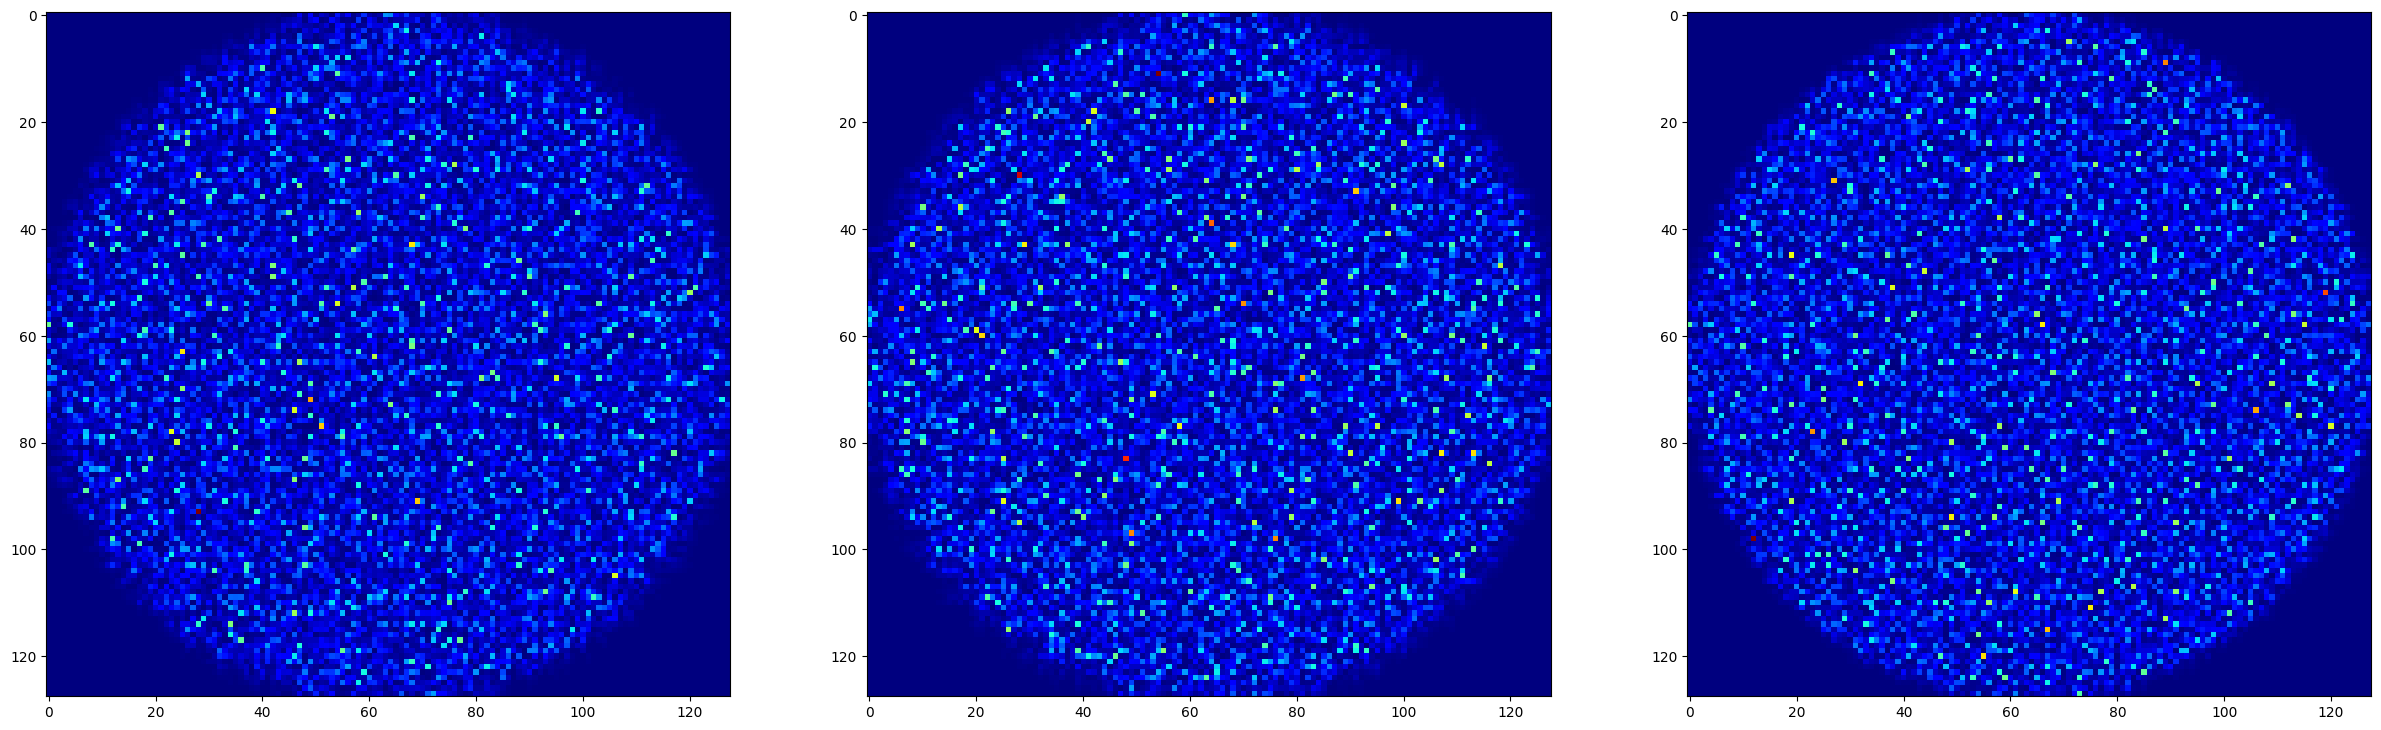

In [8]:
refractive_idcs=torch.tensor([1.499, 1.4, 1.499]).unsqueeze(-1).unsqueeze(-1)
wave_lengths=[460 * 1e-9, 260 * 1e-9, 460 * 1e-9]
wave_resolution=(128, 128)
sample_interval=8e-6
device='cpu'
depth=0.5
sensor_distance=1e-3


N, M = wave_resolution
[x, y] = np.mgrid[-N // 2:N // 2, -M // 2:M // 2].astype(np.float64)
physical_size = float(wave_resolution[0] * sample_interval)
x = x / N * physical_size
y = y / M * physical_size


squared_sum = torch.tensor(x ** 2 + y ** 2, device=device)
curvature = torch.sqrt(squared_sum + torch.tensor(depth, dtype=torch.float64) ** 2).unsqueeze(0)
A = circular_aperture(diameter=wave_resolution[0]).unsqueeze(0).to(device)
heght_map = torch.rand(1, wave_resolution[0], wave_resolution[1], dtype=torch.float64, device=device) * 1e-6


wave_nos = 2. * torch.pi / torch.tensor(wave_lengths).unsqueeze(-1).unsqueeze(-1)   
spherical_wavefront = torch.exp(1j * wave_nos * curvature)
delta_n = refractive_idcs - 1
phi = wave_nos * delta_n * heght_map 
b = torch.exp(1j * phi)
sensor_field = A * b * spherical_wavefront


sensor_incident_field = transfer_function_fresnel(sensor_field, 
                                                       sensor_distance, 
                                                       sample_interval, 
                                                       wave_lengths)
psf = torch.abs(sensor_incident_field)**2


print(f'A shape: {A.shape}, b shape: {b.shape}, curvature shape: {curvature.shape} spherical_wavefront shape: {spherical_wavefront.shape}, sensor_field shape: {sensor_field.shape}, sensor_incident_field shape: {sensor_incident_field.shape}, psf shape: {psf.shape}')
print(psf.shape)
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(psf[0].cpu().numpy(), cmap='jet')
ax[1].imshow(psf[1].cpu().numpy(), cmap='jet')
ax[2].imshow(psf[2].cpu().numpy(), cmap='jet')

In [9]:
print(psf[0]-psf[-1])

tensor([[ 1.8297e-06,  1.2147e-06,  1.5309e-06,  ...,  4.2929e-07,
          2.4177e-06,  1.9065e-06],
        [-6.8252e-08, -2.9627e-08, -8.4499e-07,  ...,  4.7589e-07,
         -1.3748e-06, -6.3128e-08],
        [ 1.8323e-06, -2.2141e-07,  6.3688e-07,  ...,  6.6290e-07,
          1.3111e-06, -1.8066e-08],
        ...,
        [ 8.0415e-07, -1.8380e-06,  5.6267e-07,  ...,  2.9138e-06,
          2.1727e-07,  1.2024e-06],
        [ 3.3501e-07, -3.5856e-07, -7.0150e-07,  ..., -1.4984e-06,
         -1.6208e-06, -8.4247e-08],
        [ 7.8137e-06,  2.6353e-06,  4.4595e-06,  ...,  2.2828e-06,
          4.8121e-06,  4.7414e-06]], dtype=torch.float64)
